# Protein-Protein Interaction based on physical interaction

Summary:

1. Dataframe

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'personal_scripts')))
import graph
import pandas
import networkx
import math
import matplotlib.pyplot
from IPython.display import Image

Dependencies(graph.py): math, networkx, numpy


In [2]:
G_test = {"A": {("B", 1), ("D", 1), ("E",1)},
     "B": {("A", 1), ("C", 1), ("E",1)},
     "C": {("B", 1), ("G", 1), ("H",1)},
     "D": {("A", 1), ("E", 1)},
     "E": {("A", 1), ("B",1), ("D",1), ("F",1)},
     "F": {("E",1), ("G", 1)},
     "G": {("C",1), ("F", 1), ("H",1)},
     "H": {("C",1), ("G",1)}}

## Dataframe

In [3]:
transcriptome = pandas.read_csv("Data/saccharomyces_cerevisiae.tsv", sep="\t")
proteome = transcriptome.loc[transcriptome["GENE.type"] == "protein-coding"]
protein_properties = pandas.read_csv("Data/protein_properties.tsv", sep="\t").drop(columns=["Gene.proteins.secondaryIdentifier"])
abundance = pandas.read_csv("Data/abundance.tsv", sep="\t")

In [4]:
informations = proteome.merge(protein_properties,how="left", on="SYSTEMATIC.name").merge(abundance.drop(columns=["SYMBOL"]), on="SYSTEMATIC.name")
informations

,NCBI.accession,CHROMOSOME.begin,CHROMOSOME.end,CHROMOSOME.value,CHROMOSOME.orientation,GENE.name,SYMBOL,GENE.id,GENE.type,NCBI.transcripts_accession,...,PROTEINS.molecular_weight,PROTEINS.pI,PROTEINS.gravy_score,PROTEINS.aromaticity_score,PROTEINS.cai,PROTEINS.instability_index,PROTEINS.aliphatic_index,SGD.id,ABUNDANCE.value,ABUNDANCE.units
0,NC_001133.9,1807,2169,I,minus,seripauperin PAU8,PAU8,851229,protein-coding,NM_001180043.1,...,12846.7,4.96,0.25,0.09,0.63,19.78,90.09,S000002142,NaN,NaN
1,NC_001133.9,2480,2707,I,plus,uncharacterized protein,NaN,1466426,protein-coding,NM_001184582.1,...,8768.8,10.52,0.23,0.12,0.07,62.86,102.53,S000028593,NaN,NaN
2,NC_001133.9,7235,9016,I,minus,putative permease SEO1,SEO1,851230,protein-coding,NM_001178208.1,...,68845.6,8.15,-0.06,0.16,0.18,35.51,86.24,S000000062,1021.0,molecules/cell
3,NC_001133.9,11565,11951,I,minus,uncharacterized protein,NaN,851232,protein-coding,NM_001179897.1,...,12916.3,4.86,0.13,0.03,0.11,21.77,86.95,S000001817,NaN,molecules/cell
4,NC_001133.9,12046,12426,I,plus,uncharacterized protein,NaN,851233,protein-coding,NM_001180042.1,...,13256.3,3.92,0.97,0.03,0.07,28.09,123.47,S000002141,1219.0,molecules/cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,NC_001224.1,48901,50097,MT,plus,mitochondrial 37S ribosomal protein VAR1,VAR1,854586,protein-coding,NaN,...,47155.2,10.39,-0.79,0.09,0.09,41.68,81.18,S000007275,3940.0,molecules/cell
6010,NC_001224.1,61022,61729,MT,plus,intron-encoded endonuclease I-SceI,SCEI,854590,protein-coding,NaN,...,27693.6,9.71,-0.38,0.13,0.14,42.26,83.33,S000007279,NaN,NaN
6011,NC_001224.1,73758,74513,MT,plus,cytochrome c oxidase subunit 2,COX2,854622,protein-coding,NaN,...,28550.2,4.20,0.35,0.12,0.19,36.99,107.88,S000007281,4586.0,molecules/cell
6012,NC_001224.1,74495,75984,MT,plus,maturase-like protein,NaN,854623,protein-coding,NaN,...,56445.4,10.08,-0.51,0.14,0.12,41.08,81.51,S000007282,NaN,NaN


In [5]:
physical_interactions = pandas.read_csv("Data/physical_interactions.tsv", sep="\t")
physical_interactions = physical_interactions[physical_interactions["SYSTEMATIC.name_p1"].isin(informations["SYSTEMATIC.name"]) & physical_interactions["SYSTEMATIC.name_p2"].isin(informations["SYSTEMATIC.name"])]
physical_interactions

,SYSTEMATIC.name_p1,SYSTEMATIC.name_p2
76,YCL069W,YCR075C
77,YCL069W,YIL004C
78,YCL067C,YCR084C
79,YCL067C,YCR097W
80,YCL067C,YBR112C
...,...,...
82729,YPR159C-A,YDR479C
82730,YPR159C-A,YIR033W
82731,YPR159C-A,YIR038C
82732,YPR159C-A,YPL094C


In [6]:
phenotypes = pandas.read_csv("Data/phenotypes.tsv", sep="\t")
phenotypes = phenotypes[phenotypes["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
phenotypes

,SGD.id,SYSTEMATIC.name,SYMBOL,MUTANT.type,PHENOTYPE.name,PHENOTYPE.qualifier
0,S000000001,YAL001C,TFC3,conditional,protein/peptide distribution,abnormal
1,S000000001,YAL001C,TFC3,conditional,protein/peptide distribution,abnormal
2,S000000001,YAL001C,TFC3,conditional,resistance to chemicals,decreased
3,S000000001,YAL001C,TFC3,conditional,resistance to chemicals,increased
4,S000000001,YAL001C,TFC3,conditional,resistance to chemicals,increased
...,...,...,...,...,...,...
194917,S000113613,YDR014W-A,HED1,NaN,protein/peptide accumulation,abnormal
194951,S000303806,YGR227C-A,OTO1,NaN,viable,NaN
194952,S000303806,YGR227C-A,OTO1,overexpression,inviable,NaN
194953,S000303806,YGR227C-A,OTO1,overexpression,vegetative growth,decreased rate


In [7]:
domains = pandas.read_csv("Data/domains.tsv", sep="\t")
domains = domains[domains["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
domains

,SYSTEMATIC.name,SYMBOL,DOMAIN.id,DOMAIN.name,DOMAIN.start,DOMAIN.end
0,YMR056C,AAC1,2136157,Mitochondrial carrier domain superfamily,14,309
1,YMR056C,AAC1,2138932,Mitochondrial substrate/solute carrier,10,106
2,YMR056C,AAC1,2138933,Mitochondrial substrate/solute carrier,116,210
3,YMR056C,AAC1,2138934,Mitochondrial substrate/solute carrier,217,304
4,YMR056C,AAC1,2138935,Mitochondrial carrier protein,16,29
...,...,...,...,...,...,...
48854,YPR204W,NaN,2161180,"Helicase, C-terminal",232,381
48855,YPR204W,NaN,2161181,"Helicase, C-terminal",257,337
48856,YPR204W,NaN,2174646,YML133C-like protein,1,174
48857,YPR204W,NaN,2174647,HELICASE WITH DEATH DOMAIN-RELATED,7,1030


In [8]:
structures = pandas.read_csv("Data/structures.tsv", sep="\t")
structures = structures[structures["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
structures

,SYSTEMATIC.name,STRUCTURE.type,STRUCTURE.begin,STRUCTURE.end
0,Q0045,HELIX,2,5
1,Q0045,HELIX,11,39
2,Q0045,STRAND,41,44
3,Q0045,STRAND,46,48
4,Q0045,HELIX,52,67
...,...,...,...,...
48003,YPR193C,HELIX,104,118
48004,YPR193C,STRAND,124,129
48005,YPR193C,HELIX,133,142
48006,YPR193C,STRAND,143,145


In [9]:
pathways = pandas.read_csv("Data/pathways.tsv", sep="\t")
pathways = pathways[pathways["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
pathways

,PATHWAY.name,SYSTEMATIC.name
0,2-Oxocarboxylic acid metabolis,YLL039C
1,2-Oxocarboxylic acid metabolis,YIL148W
2,2-Oxocarboxylic acid metabolis,YKR094C
3,2-Oxocarboxylic acid metabolis,YLR167W
4,2-Oxocarboxylic acid metabolis,YKL210W
...,...,...
4089,Vitamin B6 metabolism,YFL059W
4090,Vitamin B6 metabolism,YNL333W
4091,Vitamin B6 metabolism,YMR095C
4092,Vitamin B6 metabolism,YFL060C


In [10]:
gene_ontology = pandas.read_csv("Data/gene_ontology.tsv", sep="\t")
gene_ontology = gene_ontology[gene_ontology["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
gene_ontology

,SYSTEMATIC.name,GO.id,GO.term
0,Q0045,GO:0031966,C:mitochondrial membrane
1,Q0045,GO:0005751,C:mitochondrial respiratory chain complex IV
2,Q0045,GO:0005739,C:mitochondrion
3,Q0045,GO:0004129,F:cytochrome-c oxidase activity
4,Q0045,GO:0020037,F:heme binding
...,...,...,...
48946,YPR204W,GO:0005524,F:ATP binding
48947,YPR204W,GO:0016887,F:ATP hydrolysis activity
48948,YPR204W,GO:0003678,F:DNA helicase activity
48949,YPR204W,GO:0003676,F:nucleic acid binding


In [11]:
sequences = pandas.read_csv("Data/sequences.tsv", sep="\t")
sequences = sequences[sequences["SYSTEMATIC.name"].isin(informations["SYSTEMATIC.name"])]
sequences

,SYSTEMATIC.name,PROTEIN.seq
0,Q0045,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
1,Q0050,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
2,Q0055,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
3,Q0060,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
4,Q0065,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
...,...,...
6009,YPR200C,MVSFITSRQLKGLIENQRKDFQVVDLRREDFARDHITNAWHVPVTA...
6010,YPR201W,MSEDQKSENSVPSKVNMVNRTDILTTIKSLSWLDLMLPFTIILSII...
6011,YPR202W,MEIENEQICTCIAQILHLLNSLIITFSDDDKTETGQSFVYIDGFLV...
6012,YPR203W,MRTFTDFVSGAPIVRSLQKSTIRKYGYNLAPHMFLLLHVDELSIFS...


## Graph based method

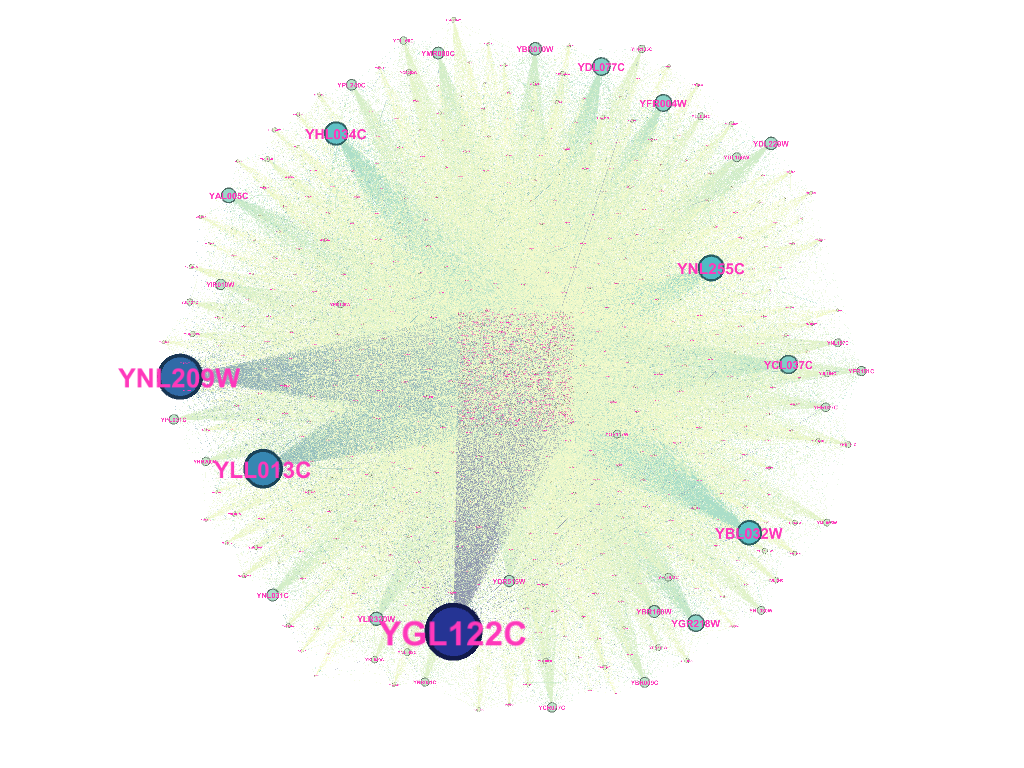

In [11]:
Image(filename="Image/physical_interactome.png")

In [12]:
G = dict()
V = set(informations["SYSTEMATIC.name"])
E = {(inter["SYSTEMATIC.name_p1"], inter["SYSTEMATIC.name_p2"]) for _, inter in physical_interactions.iterrows()}.union({(inter["SYSTEMATIC.name_p2"], inter["SYSTEMATIC.name_p1"]) for _, inter in physical_interactions.iterrows()})

In [13]:
print(f"Vertices: {len(V)}\nEdges: {int(len(E)/2)}")

Vertices: 6014
Edges: 81941


In [13]:
G = {vertice: set() for vertice in V}
for edge in E:  G[edge[0]].add((edge[1], 1))
print(f"YAL068C: {G["YAL068C"]}")

YAL068C: {('YGL158W', 1), ('YBL032W', 1), ('YMR080C', 1)}


### Properties

In [14]:
#isolated
print("Connected components before deleting isolated vertices:", len(graph.connected_component(G)))
isolated = graph.isolated_vertex(G)
print("Vertices isolated:", len(isolated))
for vertex in isolated:
    G = graph.delete_vertex(G, vertex)
print("Connected components after deleting isolated vertices:", len(graph.connected_component(G)))

Connected components before deleting isolated vertices: 314
Vertices isolated: 313
Connected components after deleting isolated vertices: 1


In [17]:
#Articulation
articulation = set()
for vertex in G:
    if list(graph.deep_first_search(G, vertex).values()).count(vertex) > 1:
        articulation.add(vertex)
len(articulation)

80

In [18]:
#Center and Diameter
center = set()
for vertex in G:
    center.add((vertex, graph.eccentricity(G, vertex)))
dist_diameter = max(list(map(lambda x: x[1], center)))
diameter = {v[0] for v in center if v[1] == dist_diameter}
dist_center = min(list(map(lambda x: x[1], center)))
center = {v[0] for v in center if v[1] == dist_center}

print(f"Diameter of {dist_diameter}:", diameter)
print(f"Center of {dist_center}:", center)

Diameter of 6: {'YFL055W', 'YIR028W', 'YDR144C', 'YPL280W', 'YPR186C', 'YOR067C', 'YMR030W', 'YGL183C'}
Center of 3: {'YFR004W', 'YPL240C', 'YGL122C'}


In [17]:
#Characteristic path length
c_p_t = 0
W, L = graph.distance_matrix(G)
W, S = graph.Floyd_Warshall(W, L)
for vertex in G:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0
    c_p_t += avg

print(f"Characteristic path length: {c_p_t/(len(G)*(len(G)-1))}")

Characteristic path length: 2.486852229679619


In [20]:
#Global efficiency
for vertex in G:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0

avg = 1/avg

print(f"Global efficiency: {(1/(len(G)*(len(G)-1)))*avg}")

Global efficiency: 0.42231191931469236


In [23]:
#Clustering coefficient
avg = 0
m = max(set().union(*(s for s in G.values())), key=lambda edge: edge[1])[1]
for vertex in G:
    avg += graph.clustering_value(W, L, G, vertex, m)

print(f"Clustering coefficient: {avg/len(G)}")


Clustering coefficient: 0.25744971160872937


In [24]:
#Degree centrality
degree = {vertex: 0 for vertex in G}
for vertex in G:
    degree[vertex] = len(G[vertex])/len(G)

print(f"Degree centrality: YFL055W => {degree["YFL055W"]}, YFR004W => {degree["YFR004W"]}")

Degree centrality: YFL055W => 0.00017540782318891423, YFR004W => 0.13822136467286442


In [27]:
#Closeness centrality
closeness = {vertex: 0 for vertex in G}
for vertex in G:
    clsnss = 0
    for i in range(len(G)):
        if i != L[vertex]:
            clsnss += W[L[vertex], i]
    closeness[vertex] = 1/clsnss

print(f"Closeness centrality: YFL055W => {closeness["YFL055W"]}, YFR004W => {closeness["YFR004W"]}")

Closeness centrality: YFL055W => 0.247234873129473, YFR004W => 0.5232718259432663


### Communities

In [19]:
#Gamma = 0.5
Cg05 = graph.Louvain_undirected(G, 0.5)

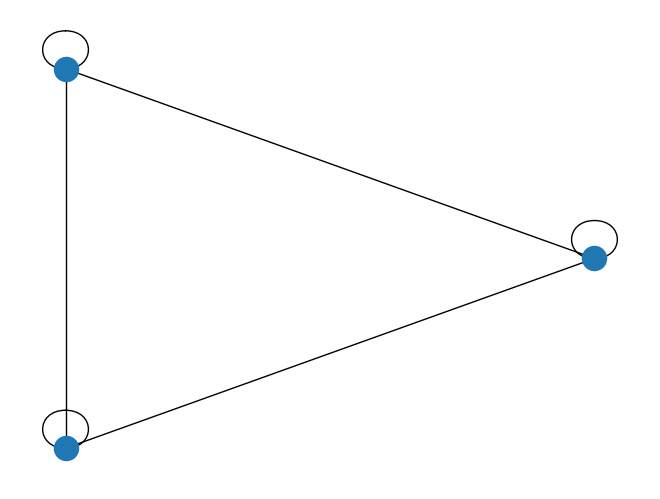

In [27]:
networkx.draw_circular(graph.dict_to_networkx(Cg05))
#gephi

In [31]:
print(f"Communities: {len(Cg05)}")


#Articulation
articulation = set()
for vertex in Cg05:
    if list(graph.deep_first_search(Cg05, vertex).values()).count(vertex) > 1:
        articulation.add(vertex)
print(f"Articulations: {len(articulation)}")


#Center and Diameter
center = set()
for vertex in Cg05:
    center.add((vertex, graph.eccentricity(Cg05, vertex)))
dist_diameter = max(list(map(lambda x: x[1], center)))
diameter = {v[0] for v in center if v[1] == dist_diameter}
dist_center = min(list(map(lambda x: x[1], center)))
center = {v[0] for v in center if v[1] == dist_center}

print(f"Diameter of {dist_diameter}:", diameter)
print(f"Center of {dist_center}:", center)


#Characteristic path length
c_p_t = 0
W, L = graph.distance_matrix(Cg05)
W, S = graph.Floyd_Warshall(W, L)
for vertex in Cg05:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0
    c_p_t += avg

print(f"Characteristic path length: {c_p_t/(len(Cg05)*(len(Cg05)-1))}")


#Global efficiency
for vertex in Cg05:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0

avg = 1/avg

print(f"Global efficiency: {(1/(len(Cg05)*(len(Cg05)-1)))*avg}")


#Clustering coefficient
avg = 0
m = max(set().union(*(s for s in Cg05.values())), key=lambda edge: edge[1])[1]
for vertex in Cg05:
    avg += graph.clustering_value(W, L, Cg05, vertex, m)

print(f"Clustering coefficient: {avg/len(Cg05)}")


Communities: 6
Articulations: 0
Diameter of 1: {'YNR044W/YCR089W/YDR249C/YJR004C/YHL012W/YOR044W/YDR072C/YIL006W/YGR146C/YMR209C/YCR107W/YML020W/YGR023W/YOR149C/YNL080C/YDL109C/YNR014W/YOR049C/YNL322C/YIL056W/YML027W/YLR094C/YHR155W/YOR172W/YOL007C/YJR153W/YNL046W/YLR077W/YDR541C/YOR226C/YOR129C/YBR004C/YKL163W/YJL094C/YHR006W/YDL180W/YML113W/YHR138C/YGR035C/YJL163C/YDR205W/YPL188W/YPL068C/YBL089W/YGR096W/YPL039W/YKR044W/YOR137C/YJL144W/YDR524C/YPL165C/YOR062C/YAR066W/YGL236C/YLR040C/YNL197C/YBR297W/YKL043W/YBR104W/YDR294C/YEL076C/YHR209W/YHL049C/YML050W/YPL113C/YDL080C/YPR088C/YGR066C/YDR435C/YOL164W/YJR036C/YHR210C/YNL193W/YDR009W/YBR240C/YMR023C/YHR038W/YBR117C/YGR109W-A/YER137C/YKL070W/YNL270C/YFL058W/YMR147W/YCL004W/YER187W/YBL081W/YBR203W/YJR027W/YJR107W/YGR288W/YDR255C/YCL039W/YBR105C/YMR135C/YIL017C/YDL176W/YIL097W/YBL049W/YGL227W/YOL101C/YER189W/YKR051W/YHL050C/YPL229W/YDL138W/YPR204W/YJL225C/YIL049W/YMR073C/YNL019C/YHR213W-A/YHL044W/YJR126C/YOR190W/YEL075C/YPL279C/YIL117C/YDR

In [17]:
#Gamma = 1
Cg1 = graph.Louvain_undirected(G, 1)

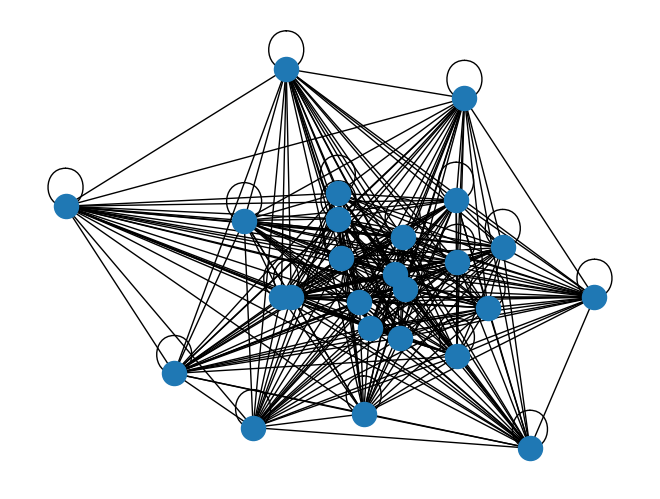

In [18]:
networkx.draw(graph.dict_to_networkx(Cg1))

In [32]:
print(f"Communities: {len(Cg1)}")


#Articulation
articulation = set()
for vertex in Cg1:
    if list(graph.deep_first_search(Cg1, vertex).values()).count(vertex) > 1:
        articulation.add(vertex)
print(f"Articulations: {len(articulation)}")


#Center and Diameter
center = set()
for vertex in Cg1:
    center.add((vertex, graph.eccentricity(Cg1, vertex)))
dist_diameter = max(list(map(lambda x: x[1], center)))
diameter = {v[0] for v in center if v[1] == dist_diameter}
dist_center = min(list(map(lambda x: x[1], center)))
center = {v[0] for v in center if v[1] == dist_center}

print(f"Diameter of {dist_diameter}:", diameter)
print(f"Center of {dist_center}:", center)


#Characteristic path length
c_p_t = 0
W, L = graph.distance_matrix(Cg1)
W, S = graph.Floyd_Warshall(W, L)
for vertex in Cg1:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0
    c_p_t += avg

print(f"Characteristic path length: {c_p_t/(len(Cg1)*(len(Cg1)-1))}")


#Global efficiency
for vertex in Cg1:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0

avg = 1/avg

print(f"Global efficiency: {(1/(len(Cg1)*(len(Cg1)-1)))*avg}")


#Clustering coefficient
avg = 0
m = max(set().union(*(s for s in Cg1.values())), key=lambda edge: edge[1])[1]
for vertex in Cg1:
    avg += graph.clustering_value(W, L, Cg1, vertex, m)

print(f"Clustering coefficient: {avg/len(Cg1)}")


Communities: 23
Articulations: 0
Diameter of 1: {'YIL002C/YKR019C/YOR316C-A/YHR088W/YFL002C/YJR094W-A/YDR091C/YIL125W/YEL054C/YLL034C/YER176W/YPL043W/YBL092W/YJL189W/YMR108W/YML065W/YLR175W/YHL033C/YPR045C/YOL041C/YER056C-A/YML073C/YDR312W/YBR158W/YPL093W/YNR053C/YGR027C/YLR061W/YML045W/YNL067W/YNL182C/YHR064C/YCL054W/YNL230C/YMR121C/YHR089C/YBR084C-A/YGL246C/YBR031W/YML074C/YLR287C-A/YKL021C/YMR242C/YAL025C/YKL082C/YIL018W/YFR034C/YLR009W/YPL259C/YDR365W-B/YGL031C/YGR038C-B/YNR046W/YOR063W/YBR181C/YKL135C/YPL131W/YGR085C/YOR312C/YLR406C/YDR418W/YMR230W/YNL112W/YGR054W/YCR072C/YPR158W-B/YMR194W/YDL063C/YGL103W/YHR085W/YDL213C/YER002W/YIL137C/YOR091W/YDR012W/YGL068W/YPL208W/YAL059W/YLR074C/YHR010W/YGL123W/YBL067C/YPR132W/YPR016C/YLR075W/YER077C/YFR001W/YPL079W/YMR310C/YDR471W/YHR013C/YLR276C/YOR118W/YOL077C/YOL040C/YHR052W/YLR340W/YER074W/YJL190C/YDL082W/YOR252W/YDR361C/YJL125C/YKR057W/YDL166C/YLR367W/YOR294W/YBR084W/YPR158C-D/YPR010C/YGL120C/YKR081C/YDR148C/YDR412W/YLR029C/YNL124W/YOR2

In [15]:
#Gamma = 1.5
Cg15 = graph.Louvain_undirected(G, 1.5)

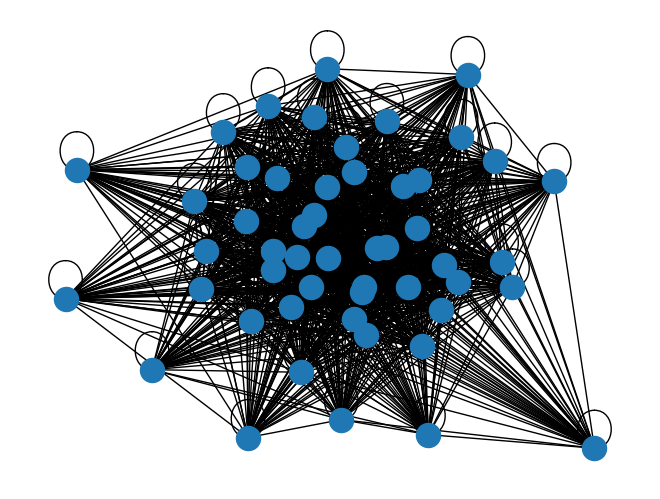

In [16]:
networkx.draw(graph.dict_to_networkx(Cg15))

In [35]:
print(f"Communities: {len(Cg15)}")


#Articulation
articulation = set()
for vertex in Cg15:
    if list(graph.deep_first_search(Cg15, vertex).values()).count(vertex) > 1:
        articulation.add(vertex)
print(f"Articulations: {len(articulation)}")


#Center and Diameter
center = set()
for vertex in Cg15:
    center.add((vertex, graph.eccentricity(Cg15, vertex)))
dist_diameter = max(list(map(lambda x: x[1], center)))
diameter = {v[0] for v in center if v[1] == dist_diameter}
dist_center = min(list(map(lambda x: x[1], center)))
center = {v[0] for v in center if v[1] == dist_center}

print(f"Diameter of {dist_diameter}:", diameter)
print(f"Center of {dist_center}:", center)


#Characteristic path length
c_p_t = 0
W, L = graph.distance_matrix(Cg15)
W, S = graph.Floyd_Warshall(W, L)
for vertex in Cg15:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0
    c_p_t += avg

print(f"Characteristic path length: {c_p_t/(len(Cg15)*(len(Cg15)-1))}")


#Global efficiency
for vertex in Cg15:
    avg = 0
    for i in range(len(W)):
        avg += W[L[vertex], i] if L[vertex] != i else 0

avg = 1/avg

print(f"Global efficiency: {(1/(len(Cg15)*(len(Cg15)-1)))*avg}")


#Clustering coefficient
avg = 0
m = max(set().union(*(s for s in Cg15.values())), key=lambda edge: edge[1])[1]
for vertex in Cg15:
    avg += graph.clustering_value(W, L, Cg15, vertex, m)

print(f"Clustering coefficient: {avg/len(Cg15)}")


Communities: 47
Articulations: 0
Diameter of 2: {'YNR075C-A/YPR067W/YJR122W/YKR049C/YBR058C/YBL086C/YDL182W/YDR261W-B/YDR261W-A/YCL019W/YKL134C/YDL066W/YPL109C/YGR031W/YNL009W/YGR204W/YLR178C/YIL137C/YBR286W/YER081W/YBR249C/YLR256W-A/YMR045C/YHR115C/YLR227W-A/YFL002W-A/YLR410W-B/YJR028W/YDL106C/YFR034C/YLR359W/YJR026W/YNL054W-B/YGR161W-B/YLR157C-A/YML040W/YDR210W-B/YDR034C-D/YDL127W/YGR161C-C/YKR099W/YBR276C', 'YKL189W/YHR102W/YOR353C/YBL069W/YBR018C/YIR016W/YFL034C-B/YCL051W/YER067W/YDR528W/YNL161W/YOL036W/YLR371W/YLR425W/YPL066W/YBR011C/YDL203C/YGR023W/YHR030C/YBL068W/YLR187W/YOL061W/YER099C/YGR070W/YJR139C/YGR257C/YPR105C/YEL070W/YNL051W/YAR009C/YGL223C/YNL041C/YFR048W/YML071C/YMR181C/YOR280C/YOL029C/YMR186W/YDL048C/YGL005C/YFR042W/YOR336W/YNL322C/YAL058W/YPR159W/YGR143W/YML057W/YKL159C/YKL190W/YMR211W/YOR315W/YPR047W/YNL024C/YJR138W/YIL044C/YPL258C/YLR096W/YDL037C/YHR049W/YEL062W/YOL138C/YDR128W/YHR136C/YBL104C/YHL023C/YOR093C', 'YDR255C/YCL039W/YBR105C/YMR135C/YIL017C/YDL176W/YIL0

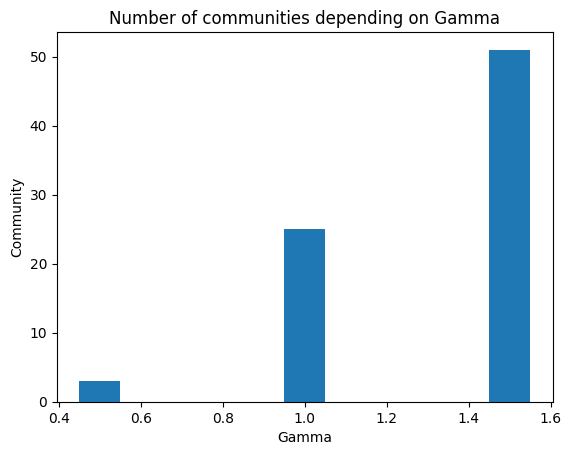

In [54]:
#Comparative Vertices
matplotlib.pyplot.bar(x=[0.5, 1, 1.5], height=[len(Cg05), len(Cg1), len(Cg15)], width=0.1)
matplotlib.pyplot.title("Number of communities depending on Gamma")
matplotlib.pyplot.xlabel("Gamma")
matplotlib.pyplot.ylabel("Community")
matplotlib.pyplot.show()

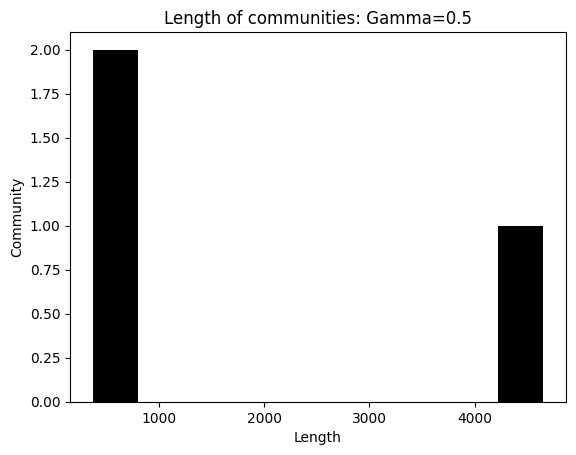

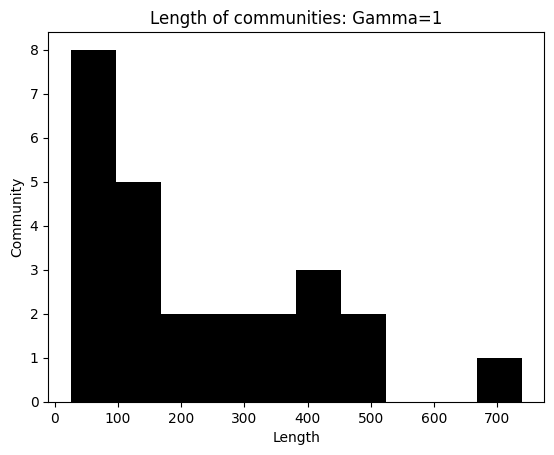

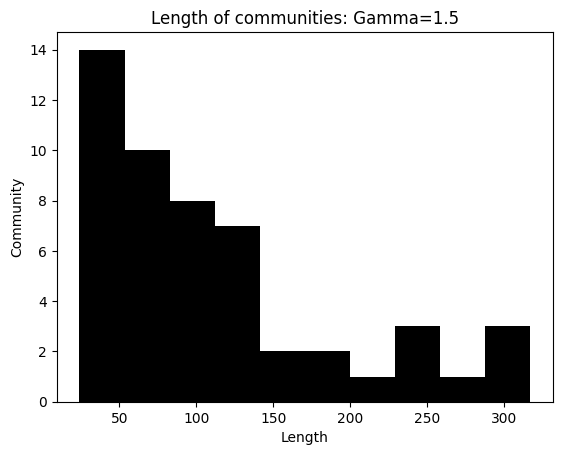

In [64]:
#Comparative length of communities
for C in [("Gamma=0.5", Cg05), ("Gamma=1", Cg1), ("Gamma=1.5", Cg15)]:
    matplotlib.pyplot.hist(x=[len(community.split('/')) for community in C[1]], label="Gamma=0.5", color="black")
    matplotlib.pyplot.title(f"Length of communities: {C[0]}")
    matplotlib.pyplot.xlabel("Length")
    matplotlib.pyplot.ylabel("Community")
    matplotlib.pyplot.show()

In [75]:
#Analysis of Cg15
gene_to_pathway = {gene: set() for gene in pathways["SYSTEMATIC.name"]}
gene_to_go = {gene: set() for gene in gene_ontology["SYSTEMATIC.name"]}

for path in pathways.itertuples(index=False):
    gene_to_pathway[path[1]].add(path[0])

for go in gene_ontology.itertuples(index=False):
    gene_to_go[go[0]].add(go[2])

cnt = 0

for community in Cg15:
    cnt += 1
    community = community.split("/")
    cnt_pathway = {path: 0 for path in pathways["PATHWAY.name"]}
    cnt_go = {goterm: 0 for goterm in gene_ontology["GO.term"]}
    
    for gene in community:
        try :
            for path in gene_to_pathway[gene]:
                cnt_pathway[path] += 1
        except: pass
        try:
            for goterm in gene_to_go[gene]:
                cnt_go[goterm] += 1
        except: pass
    
    cnt_pathway = {p: v for p, v in sorted(cnt_pathway.items(), key=lambda x: x[1], reverse=True) if v > len(community)/50}
    cnt_go = {g: v for g, v in sorted(cnt_go.items(), key=lambda x: x[1], reverse=True) if v > len(community)/50}

    cnt_go_f = {g: v for g, v in cnt_go.items() if g[0] == "F"}
    cnt_go_p = {g: v for g, v in cnt_go.items() if g[0] == "P"}
    cnt_go_c = {g: v for g, v in cnt_go.items() if g[0] == "C"}

    for go in [("Molecular Function", cnt_go_f), ("Biological Process",cnt_go_p), ("Cellular Component", cnt_go_c)]:
        matplotlib.pyplot.figure(figsize=(20, 6))
        matplotlib.pyplot.bar(go[1].keys(), go[1].values())
        matplotlib.pyplot.set_xticks(rotation=90, ha='right', fontsize=10)

        matplotlib.pyplot.ylabel("Gene")

        matplotlib.pyplot.title(f"Community({cnt})/Genes({len(community)}) {go[0]} Enrichment")

        matplotlib.pyplot.savefig(f"Chart/{go[0]}/community_{cnt}.pdf", bbox_inches='tight')

        if cnt == 1:    matplotlib.pyplot.show()

        matplotlib.pyplot.close()

    matplotlib.pyplot.figure(figsize=(10, 6))
    matplotlib.pyplot.bar(cnt_pathway.keys(), cnt_pathway.values())
    matplotlib.pyplot.set_xticks(rotation=90, ha='right', fontsize=10)

    matplotlib.pyplot.ylabel("Gene")

    matplotlib.pyplot.title(f"Community({cnt})/Genes({len(community)}) Pathway Enrichment")

    matplotlib.pyplot.savefig(f"Chart/Pathway/community_{cnt}.pdf", bbox_inches='tight')

    if cnt == 1:    matplotlib.pyplot.show()

    matplotlib.pyplot.close()

NameError: name 'Cg15' is not defined

In [15]:
#Sequence and Structure Analysis
Cg2 = graph.Louvain_undirected(G, 2)

In [16]:
len(Cg2)

73

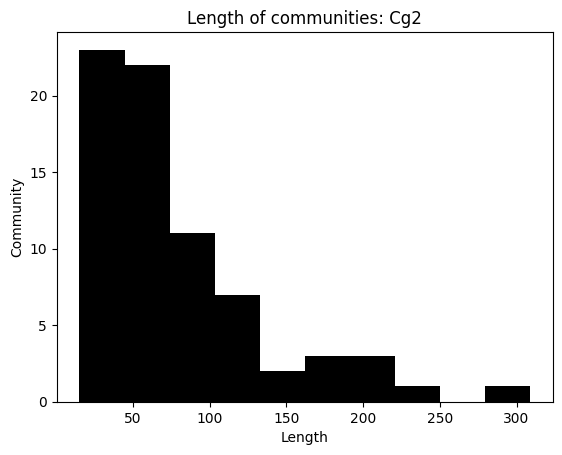

In [17]:
matplotlib.pyplot.hist(x=[len(community.split('/')) for community in Cg2], label="Gamma=0.5", color="black")
matplotlib.pyplot.title(f"Length of communities: Cg2")
matplotlib.pyplot.xlabel("Length")
matplotlib.pyplot.ylabel("Community")
matplotlib.pyplot.show()

In [39]:
dict_sequence = {gene: seq for gene, seq in sequences.itertuples(index=False)}
dict_structure = {gene: {"HELIX": [], "STRAND": [], "TURN": []} for gene in structures["SYSTEMATIC.name"]}

for struc in structures.itertuples(index=False):
    dict_structure[struc[0]][struc[1]] += list(range(struc[2], struc[3]+1))

In [96]:
gene_to_pathway = {gene: set() for gene in pathways["SYSTEMATIC.name"]}
gene_to_go = {gene: set() for gene in gene_ontology["SYSTEMATIC.name"]}

for path in pathways.itertuples(index=False):
    gene_to_pathway[path[1]].add(path[0])

for go in gene_ontology.itertuples(index=False):
    gene_to_go[go[0]].add(go[2])
    
co = 0
for community in Cg2:
    fig, axs = matplotlib.pyplot.subplots(1, 5, figsize=(70, 20))
    co += 1
    community = community.split("/")
    cnt = 0
    working = False
    cnt_pathway = {path: 0 for path in pathways["PATHWAY.name"]}
    cnt_go = {goterm: 0 for goterm in gene_ontology["GO.term"]}
    for gene in community:
        if gene in dict_structure:
            cnt += 2
            axs[0].scatter(x=len(dict_sequence[gene])+1, y=cnt, color="cyan", s=50)
            axs[0].scatter(x=dict_structure[gene]["HELIX"], y=[cnt for _ in range(len(dict_structure[gene]["HELIX"]))], color='red', s=5)
            axs[0].scatter(x=dict_structure[gene]["STRAND"], y=[cnt for _ in range(len(dict_structure[gene]["STRAND"]))], color="green", s=5)
            axs[0].scatter(x=dict_structure[gene]["TURN"], y=[cnt for _ in range(len(dict_structure[gene]["TURN"]))], color="black", s=5)
            axs[0].set_title(f"Community({co})/Gene({len(community)}) Structure Enrichment")
            axs[0].text(x=len(dict_sequence[gene])+10, y=cnt, s=gene, fontsize=10)
            working = True
        if gene in gene_to_pathway:
            for path in gene_to_pathway[gene]:
                cnt_pathway[path] += 1
        if gene in gene_to_go:
            for goterm in gene_to_go[gene]:
                cnt_go[goterm] += 1

    cnt_pathway = {p: v for p, v in sorted(cnt_pathway.items(), key=lambda x: x[1], reverse=True) if v > len(community)/50}
    cnt_go = {g: v for g, v in sorted(cnt_go.items(), key=lambda x: x[1], reverse=True) if v > len(community)/50}

    cnt_go_f = {g: v for g, v in cnt_go.items() if g[0] == "F"}
    cnt_go_p = {g: v for g, v in cnt_go.items() if g[0] == "P"}
    cnt_go_c = {g: v for g, v in cnt_go.items() if g[0] == "C"}

    g = 0
    c = ["blue", "grey", "orange"]
    for go in [("Molecular Function", cnt_go_f), ("Biological Process",cnt_go_p), ("Cellular Component", cnt_go_c)]:
        axs[1+g].set_title(f"Community({co})/Genes({len(community)}) {go[0]} Enrichment")

        axs[1+g].bar(go[1].keys(), go[1].values(), label=go[0], color=c[g])
        axs[1+g].set_xticks(range(len(go[1].keys())))
        axs[1+g].set_xticklabels(go[1].keys(), rotation=90, ha='right', fontsize=10)

        axs[1+g].set_ylabel("Gene")
        axs[1+g].legend()

        g += 1

    axs[4].bar(cnt_pathway.keys(), cnt_pathway.values())
    axs[4].set_xticks(range(len(cnt_pathway.keys())))
    axs[4].set_xticklabels(cnt_pathway.keys(), rotation=90, ha='right', fontsize=10)

    axs[4].set_ylabel("Gene")

    axs[4].set_title(f"Community({co})/Genes({len(community)}) Pathway Enrichment")

    matplotlib.pyplot.tight_layout()

    if working: matplotlib.pyplot.savefig(f"Chart/Structure/community_{co}.pdf", bbox_inches='tight')
    matplotlib.pyplot.close()

    break
    